In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cols = ["area", "perimeter", "compactness", "length","width","asymmetry", "groove", "class"]
df=pd.read_csv("seeds_dataset.txt", names=cols, sep="\s+")

In [ ]:
df.head()

In [ ]:
for i in range (len(cols)-1):
  for j in range(i+1, len(cols)-1):
    x_label = cols[i]
    y_label = cols[j]
    sns.scatterplot(x=x_label, y=y_label, data=df, hue='class')
    plt.show()

#Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
x = 'compactness'
y = 'asymmetry'
x1 = df[[x, y]].values

In [ ]:
kmeans=KMeans(n_clusters = 3).fit(x1)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
clusters = kmeans.labels_

In [ ]:
clusters

array([2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 1,
       0, 2, 2, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1, 1, 1, 2, 0, 2, 2, 0,
       1, 1, 2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 2, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 0,
       0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 2, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int32)

In [ ]:

cluster_df = pd.DataFrame(np.hstack((x1, clusters.reshape(-1, 1))), columns=[x, y, "class"])
# cluster_df = pd.DataFrame(np.hstack((x, clusters.reshape(-1, 1))), columns=[x,y, "class"])

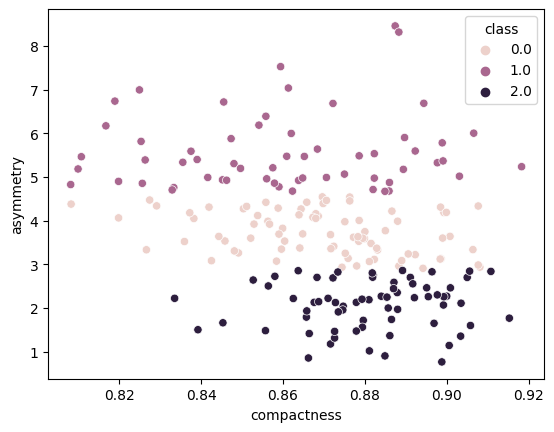

In [ ]:

sns.scatterplot(x=x, y=y, hue='class', data=cluster_df)
plt.show()

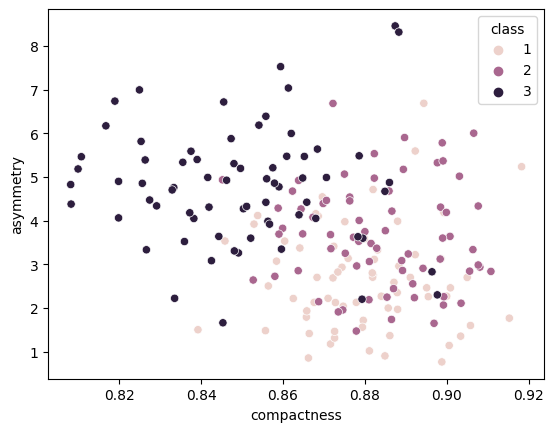

In [ ]:
sns.scatterplot(x=x_col, y=y_col, hue='class', data=df)
plt.show()

#Higher dimesnions

In [ ]:
x3 = df[cols[:-1]].values

In [ ]:
kmeans = KMeans(n_clusters = 3).fit(x3)
cluster_df=pd.DataFrame(np.hstack((x3, kmeans.labels_.reshape(-1,1))), columns=df.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
sns.scatterplot(x=x_col, y=y_col, hue='class', data=cluster_df)
plt.show()

In [ ]:
sns.scatterplot(x=x_col, y=y_col, hue='class', data=df)
plt.show()

#pca(We are reducing the dimensions....maping multiple dimensions into lower dimesnsions)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components =2)
transformed_x = pca.fit_transform(x3)

In [ ]:
x3.shape

(210, 7)

In [ ]:
transformed_x.shape

(210, 2)

In [ ]:
transformed_x[:5]

array([[ 0.66344838, -1.41732098],
       [ 0.31566651, -2.68922915],
       [-0.6604993 , -1.13150635],
       [-1.0552759 , -1.62119002],
       [ 1.61999921, -2.18338442]])

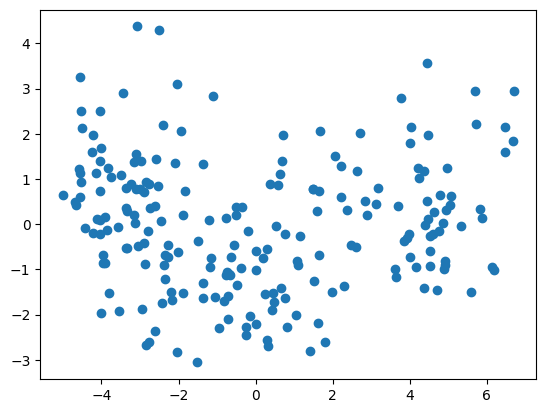

In [ ]:
plt.scatter(transformed_x[:,0], transformed_x[:,1])
plt.show()

In [ ]:
pca_df=pd.DataFrame(np.hstack((transformed_x, kmeans.labels_.reshape(-1,1))), columns=["pca1", "pca2", "class"])

In [ ]:
truth_df=pd.DataFrame(np.hstack((transformed_x, df["class"].values.reshape(-1,1))), columns=["pca1", "pca2", "class"])

[]

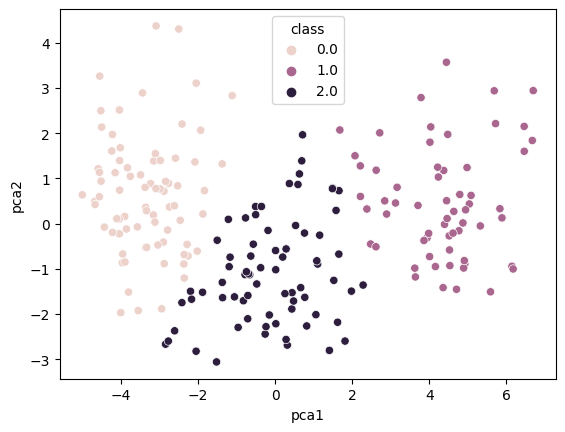

In [ ]:
sns.scatterplot(x="pca1", y="pca2",hue="class", data=pca_df)
plt.plot()

[]

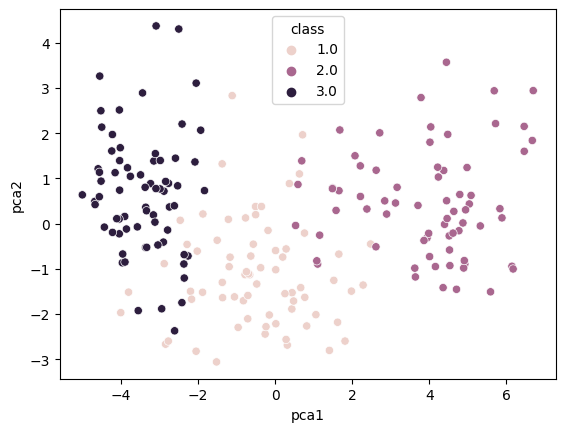

In [ ]:
sns.scatterplot(x="pca1", y="pca2",hue="class", data=truth_df)
plt.plot()